In [1]:
# панды
import pandas as pd
# сиборн
import matplotlib.pyplot as plt
import seaborn as sns
# импортируем коэффициент phik
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.7 MB/s eta 0:00:00


In [1]:
# F-строка
variable = 5
f"Мне {variable} лет"


'Мне 5 лет'

In [2]:
# list comprehension
# возведем в квадрат циклом
squares = []
for x in range(10):
  squares.append(x ** 2)

squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [3]:
# или list comprehension

squares = [x ** 2 for x in range(10)]
squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [4]:
# добавим услове if в list comprehension

odds = [x ** 2 for x in range(10) if x % 2 != 0]
odds

[1, 9, 25, 49, 81]

In [5]:
# альтернативное условие if else в list comprehension
# если в условии нужен else, то всё условие пишется до for:
odds_2 = [x ** 2 if x % 2 == 0 else x ** 3 for x in range(10)]
odds_2

[0, 1, 4, 27, 16, 125, 36, 343, 64, 729]

In [6]:
# Сеты - имеют тольео уникальны значения
nums = [1,1,2,3,3,3,4,4,5]
nums

[1, 1, 2, 3, 3, 3, 4, 4, 5]

In [7]:
set(nums)

{1, 2, 3, 4, 5}

In [ ]:
# классы

In [8]:
it_specialists = [('Jon', 'DE', 150),
                  ('Carl', 'DA', 120),
                   ('Gleb', 'DS', 300)]

In [9]:
# создаем шаблон класса
class ItSpecialist:
  def __init__(self, name, speciality, salary): # selef параметр, который мы добавляем всегда
    self.name = name
    self.speciality = speciality
    self.salary = salary

# добавим метод в класс
  def tell_about_yourself(self): # self дает доступ параметрам класса, котрые прописали выше
   return f'Hi my name is {self.name}. I\'m a {self.speciality}. My salary is {self.salary}'

In [10]:
# создаем обьект на основании класса (шаблона класса выше)
jon = ItSpecialist('Jon', 'DE', 120)


In [11]:
# обратимся к параметру обьекта jon
jon.name        # jon
jon.speciality  # DE
jon.salary      # 120

# обратимся к методу
jon.tell_about_yourself() # Hi my name is Jon. I'm a DE. My salary is 120

"Hi my name is Jon. I'm a DE. My salary is 120"

In [12]:
# У Карла своя история
carl = ItSpecialist('Carl','DA',120)
carl.tell_about_yourself()

"Hi my name is Carl. I'm a DA. My salary is 120"

In [13]:
# Наследование классов
class DataScintist(ItSpecialist): # создаем DataScintist на основе ItSpecialist
# если pass то просто скопируется работв ItSpecialist в DataScintist
 def ml(self, data):
  return 'Profit for my company and myself'

In [14]:
# теперь DataScintist с теми же параметрами что и ItSpecialist, но имеет новый метод ml
gleb = DataScintist('Gleb', 'DS', 300)
gleb.ml('data') # Profit for my company and myself
gleb.tell_about_yourself()

# не добавил использование super().__init__() но это обращение к классу выше, который основной

"Hi my name is Gleb. I'm a DS. My salary is 300"

In [15]:
# Горячие клавиши collab
# shift+enter - запуск ячейки
# control+m   - входим в режим горяч клавиш
# d           - удалить ячейку
# b           - добавить ячейку под
# u           - добавить ячейку над
# m           - перевести ячейку в markdown
# y           - перевестия чеку в код


Датасет датасайнтистов: https://drive.google.com/file/d/1ShuHEz-39WzWgUoMJ-hzsF8zhKzHBVe8/view?usp=sharing

In [16]:
! gdown --id 1ShuHEz-39WzWgUoMJ-hzsF8zhKzHBVe8

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ShuHEz-39WzWgUoMJ-hzsF8zhKzHBVe8
To: /content/hr_analytics.zip
100% 302k/302k [00:00<00:00, 99.2MB/s]


In [17]:
! unzip /content/hr_analytics.zip

Archive:  /content/hr_analytics.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [139]:
df = pd.read_csv('/content/aug_train.csv')#, encoding = 'cp1251') для декодирования кириллицы

In [20]:
df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
df[['city']].head(5) # 2 скобки переводят в табличный вид в место Siries

,city
0,city_103
1,city_40
2,city_21
3,city_115
4,city_162


In [22]:
# параметр inplace=True) задает изменение в текущем датасете (старый вид записи)

In [23]:
# assign() создает временый столбец для подсчета yfна лету чего-либо, при этом в таблице его не будет
df.assign(city_1 = 'city_103')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_1
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,city_103
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,city_103
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,city_103
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,city_103
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,city_103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0,city_103
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0,city_103
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0,city_103
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0,city_103


In [24]:
# isna() - пропуски, mean() - среднее, получается среднее по пропускам
df.isna().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

Непрерывные и категориальные (дискретные) значения

<Axes: >

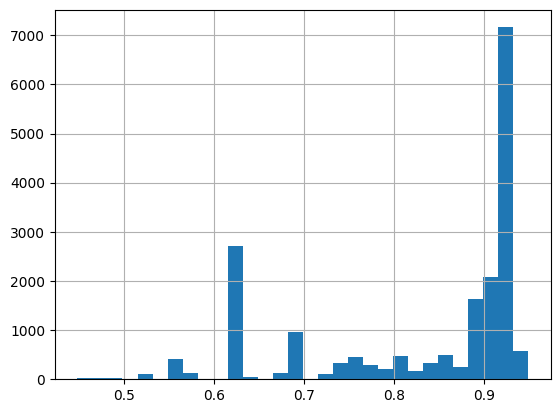

In [25]:
# Непрервные лучше всего гистограммой
# или среднего и медианы
df.city_development_index.hist(bins=30)

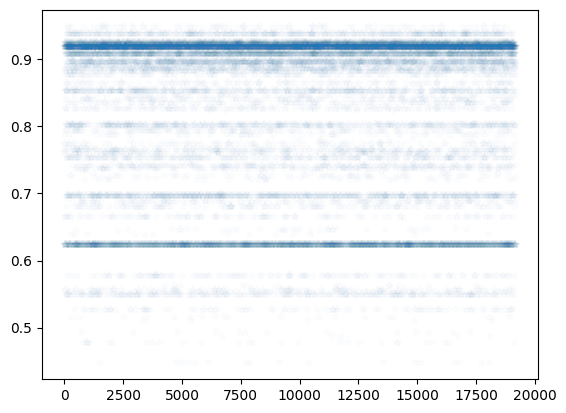

In [27]:
plt.plot(df.city_development_index, '*', alpha=0.01)
plt.show() # 2 нормальных распределения: около 0,6 и 0,9

In [28]:
# Категориальные только можно посчитать в шт
df['gender'].value_counts(dropna=False) # обязательно dropna=False иначе пропуски не заметит и цифры не сойдутся

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

In [29]:
# Фильтрация по квантилю

<Axes: >

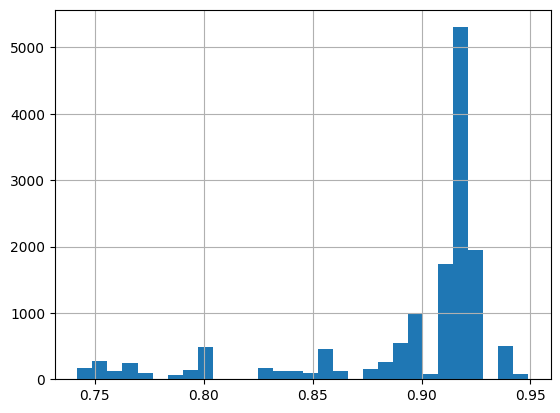

In [30]:
# функция .quantile() дает нам заданный квантиль
q1 = df['city_development_index'].quantile(0.25) # q =0.74
df[df['city_development_index'] > q1]['city_development_index'].hist(bins=30) # больше перыых 25% значений в гистограмме

<Axes: >

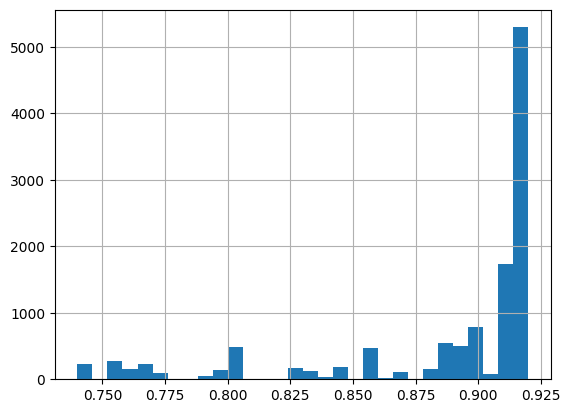

In [31]:
q2 = df['city_development_index'].quantile(0.75) # q =0.92
df[df['city_development_index'].between(q1, q2)]['city_development_index'].hist(bins=30) # срез бежду 2 квантилями

In [32]:
# непрервыне переменные удобно считать разбив их на равные части pd.cut()

df['city_development_index_group'] = pd.cut(df['city_development_index'],5)

In [33]:
# pd.qcut() # дает более точное разделение по квантилям а cut() менее точное и можно вставлять []
df['city_development_index_group_q'] = pd.cut(df['city_development_index'],5) # удаляет дубликаты, duplicates='drop')

In [34]:
# groupby() VS pivot_table()

In [35]:
df.groupby('gender', dropna=False)['target'].mean() # в () по чему разбиваем, в [] что разбиваем и агрегирующая функция
# или 2 агрегирующие функции
df.groupby('gender', dropna=False)['target'].agg(['count', 'mean']) # dropna=False или пропуски не учтет




,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780
NaN,4508,0.308119


In [36]:
tab = df.pivot_table(index= 'gender', values= 'target', aggfunc={'count', 'mean'}) # pivot_table не может учитывать
tab

,count,mean
gender,,
Female,1238,0.263328
Male,13221,0.227819
Other,191,0.261780


In [37]:
df['gender'] = df['gender'].fillna('No info') # исправили ситуацию учли пропуски
agg_tab = df.pivot_table(index= 'gender', values= 'target', columns='major_discipline', \
                         aggfunc={'count', 'mean'}).reset_index() # если поставить aggfunc=[], то будет мультииндекс

agg_tab

gender count                                            \
major_discipline           Arts Business Degree Humanities No Major Other   
0                  Female    36              25        118       16    36   
1                    Male   160             226        429      163   247   
2                 No info    50              73        114       41    91   
3                   Other     7               3          8        3     7   

                             mean                                       \
major_discipline   STEM      Arts Business Degree Humanities  No Major   
0                   928  0.250000        0.280000   0.237288  0.500000   
1                 10145  0.206250        0.252212   0.202797  0.226994   
2                  3304  0.180000        0.301370   0.210526  0.243902   
3                   115  0.285714        0.000000   0.250000  0.000000   

                                      
major_discipline     Other      STEM  
0                 0.277778  0.262931  
1                 0.234818  0.238738  
2                 0.362637  0.329903  
3                 0.142857  0.304348

In [38]:
# убрали мультииндекс (двойной индекс)
agg_tab.columns = [' '.join(col) for col in agg_tab.columns]
agg_tab

,gender,count Arts,count Business Degree,count Humanities,count No Major,count Other,count STEM,mean Arts,mean Business Degree,mean Humanities,mean No Major,mean Other,mean STEM
0,Female,36,25,118,16,36,928,0.250000,0.280000,0.237288,0.500000,0.277778,0.262931
1,Male,160,226,429,163,247,10145,0.206250,0.252212,0.202797,0.226994,0.234818,0.238738
2,No info,50,73,114,41,91,3304,0.180000,0.301370,0.210526,0.243902,0.362637,0.329903
3,Other,7,3,8,3,7,115,0.285714,0.000000,0.250000,0.000000,0.142857,0.304348


In [39]:
# Разобьем по 5 группам из pd.cut(5)

df.groupby('city_development_index_group_q', dropna=False)['target'].agg(['count', 'mean'])


,count,mean
city_development_index_group_q,,
"(0.447, 0.548]",178,0.578652
"(0.548, 0.648]",3297,0.582651
"(0.648, 0.749]",1529,0.273381
"(0.749, 0.849]",1949,0.194459
"(0.849, 0.949]",12205,0.160262


<ipython-input-40-ace39e47d81f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  t = df.corr()


<Axes: >

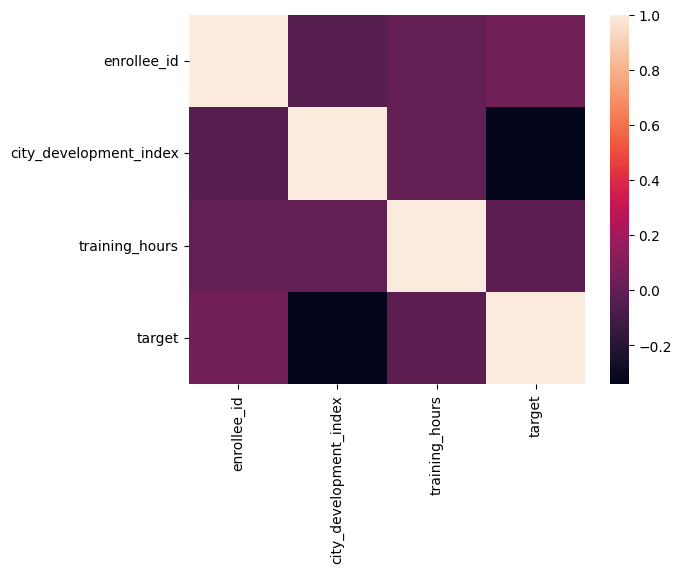

In [40]:
t = df.corr()
sns.heatmap(t)

In [19]:
# Корреляция и phick
# выше импортнули phik


In [43]:
# phik это показатель не линейной корреляции
phik_tab = df.phik_matrix()
phik_tab

interval columns not set, guessing: ['enrollee_id', 'city_development_index', 'training_hours', 'target']


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,city_development_index_group,city_development_index_group_q
enrollee_id,1.000000,0.214019,0.125181,0.125045,0.073145,0.051188,0.076123,0.030968,0.086949,0.032956,0.022543,0.045252,0.021517,0.067472,0.118153,0.118153
city,0.214019,1.000000,1.000000,0.235773,0.152621,0.376293,0.363706,0.178508,0.346552,0.249869,0.224174,0.240315,0.075165,0.477283,1.000000,1.000000
city_development_index,0.125181,1.000000,1.000000,0.163535,0.101448,0.245979,0.224368,0.129083,0.307770,0.130592,0.112234,0.172067,0.000000,0.482287,1.000000,1.000000
gender,0.125045,0.235773,0.163535,1.000000,0.175232,0.081010,0.051922,0.087460,0.202654,0.036975,0.073239,0.093596,0.009124,0.116653,0.114481,0.114481
relevent_experience,0.073145,0.152621,0.101448,0.175232,1.000000,0.237586,0.259716,0.098661,0.500107,0.074259,0.284810,0.539529,0.020727,0.199859,0.059986,0.059986
enrolled_university,0.051188,0.376293,0.245979,0.081010,0.237586,1.000000,0.215062,0.151561,0.434500,0.067175,0.231786,0.430596,0.000000,0.093803,0.174196,0.174196
education_level,0.076123,0.363706,0.224368,0.051922,0.259716,0.215062,1.000000,0.104318,0.302908,0.082131,0.116321,0.253235,0.030104,0.075999,0.127624,0.127624
major_discipline,0.030968,0.178508,0.129083,0.087460,0.098661,0.151561,0.104318,1.000000,0.116505,0.038923,0.089031,0.047317,0.000000,0.029200,0.101880,0.101880
experience,0.086949,0.346552,0.307770,0.202654,0.500107,0.434500,0.302908,0.116505,1.000000,0.127647,0.112121,0.468247,0.000000,0.238725,0.335891,0.335891
company_size,0.032956,0.249869,0.130592,0.036975,0.074259,0.067175,0.082131,0.038923,0.127647,1.000000,0.332074,0.102736,0.000000,0.071953,0.095912,0.095912


<Axes: >

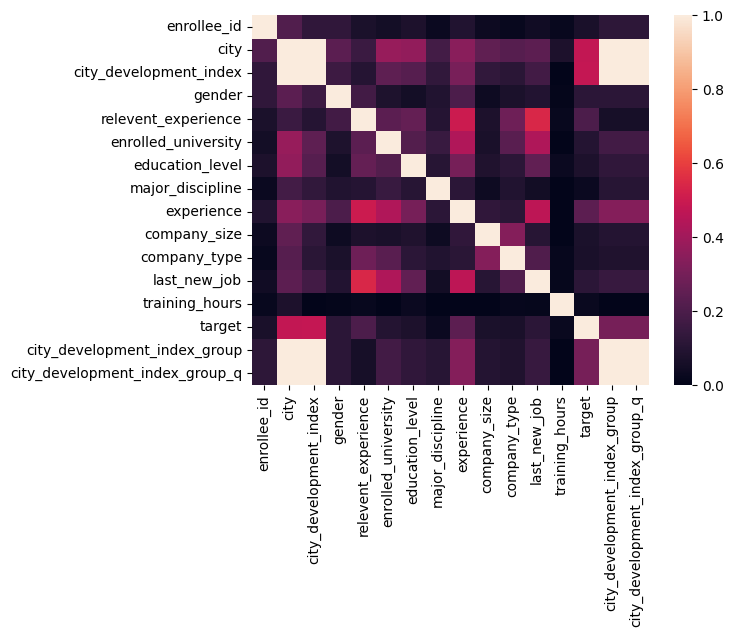

In [44]:
# подсветим таблицу phik
sns.heatmap(phik_tab)

In [45]:
# возьмеме коррелицию phik по столбцу target, отсортируем по убыванию
# получается, что наибольшая связь по phik есть c city_development_index
# тут надо разобраться
phik_tab['target'].sort_values(ascending=False)

target                            1.000000
city_development_index            0.482287
city                              0.477283
city_development_index_group      0.302403
city_development_index_group_q    0.302403
experience                        0.238725
relevent_experience               0.199859
gender                            0.116653
last_new_job                      0.114708
enrolled_university               0.093803
education_level                   0.075999
company_size                      0.071953
enrollee_id                       0.067472
company_type                      0.066792
major_discipline                  0.029200
training_hours                    0.026849
Name: target, dtype: float64

In [46]:
# тут видно, что наименьшее желание сменить работу у развитых городов и нибольшее с низкой развитостью
df.groupby('city_development_index_group_q', dropna=False)['target'].agg(['count', 'mean']).reset_index()

,city_development_index_group_q,count,mean
0,"(0.447, 0.548]",178,0.578652
1,"(0.548, 0.648]",3297,0.582651
2,"(0.648, 0.749]",1529,0.273381
3,"(0.749, 0.849]",1949,0.194459
4,"(0.849, 0.949]",12205,0.160262


In [141]:
# предобработаеи данные перед скаттером
df['city_development_index'] = df['city_development_index'].fillna('0')
df['experience'] = df['experience'].fillna('0').replace('>20', 999).replace('<1', 0).astype(int)

<Axes: xlabel='city_development_index', ylabel='experience'>

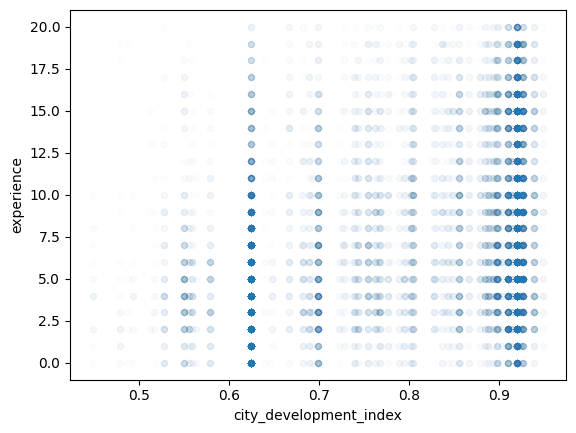

In [142]:
# scatter plot/скатерплот
# на графике видно соотношение количества и количества спецов по уровню развития города

#df[df['experience']< 999] # убрали все нереальные значения
df[df['experience']< 999].plot( x='city_development_index', y='experience', kind="scatter", alpha = 0.01)# добавили alpha 0,01 так как график слишком плотный

In [151]:
# из сводной видно, что кроме соотношения количества и качества спецов по индексу развития
# медианное значение везде выше среднего, а это значит, что много выбросов вниз, а это значит много начиающих спецов
df['exp_cut'] = pd.qcut(df['experience'],5)

df.groupby('exp_cut')['city_development_index'].agg(['count', 'mean', 'median'])

,count,mean,median
exp_cut,,,
"(-0.001, 4.0]",5020,0.778527,0.804
"(4.0, 6.0]",2646,0.803232,0.887
"(6.0, 11.0]",4459,0.827910,0.897
"(11.0, 18.0]",3295,0.858314,0.910
"(18.0, 999.0]",3738,0.889704,0.920


In [ ]:
# добавить -OK

# -загрузить данные-
# -использование: assign(), copy(), isna().mean()-
# для ненепрерывных гистограммы hist() и сравнить с кривой распределения
# дискретные, категориальные, прервыные
# -фильтрация по процентилю-
# сюрпризы pivot_table() VS groupby()
# анализ непрерывных перемнных с помощью pd.cut(), pd.qcut()
# лайфхаки со словарем, replace, apply
# корреляция и phik
# игрушечные данные
# numpy

# plot(kind='bar')

# Человеческое обучение

In [1]:

# добавить Человеческое обучение

# -загрузить данные-
# train и test выборки, гипотеза с графиком о 'новая значит дороже'
# baseline - это... и посчитать

Датасет бу авто: https://drive.google.com/file/d/1SVntexHtshbVTotXk2z525whWcvcOxXy/view?usp=sharing

In [2]:
# загрузили файл с гугл-диска
! gdown --id 1SVntexHtshbVTotXk2z525whWcvcOxXy

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1SVntexHtshbVTotXk2z525whWcvcOxXy
To: /content/uk_used_cars.zip
100% 1.15M/1.15M [00:00<00:00, 42.3MB/s]


In [3]:
# расзиповали файл в папку /content/uk_used_cars
! unzip /content/uk_used_cars.zip -d /content/uk_used_cars

Archive:  /content/uk_used_cars.zip
  inflating: /content/uk_used_cars/audi.csv  
  inflating: /content/uk_used_cars/bmw.csv  
  inflating: /content/uk_used_cars/cclass.csv  
  inflating: /content/uk_used_cars/focus.csv  
  inflating: /content/uk_used_cars/ford.csv  
  inflating: /content/uk_used_cars/hyundi.csv  
  inflating: /content/uk_used_cars/merc.csv  
  inflating: /content/uk_used_cars/skoda.csv  
  inflating: /content/uk_used_cars/toyota.csv  
  inflating: /content/uk_used_cars/unclean cclass.csv  
  inflating: /content/uk_used_cars/unclean focus.csv  
  inflating: /content/uk_used_cars/vauxhall.csv  
  inflating: /content/uk_used_cars/vw.csv  


In [280]:
df = pd.read_csv('/content/uk_used_cars/bmw.csv')

# df[df['model'] == ' X2'] pandas notation
# df.query('model == " X2"') query
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [5]:
# пример можно удалять
df[df['model'] == ' X2'] .groupby('fuelType')['engineSize'].agg(['count', 'median'])

,count,median
fuelType,,
Diesel,147,2.0
Petrol,141,2.0


In [6]:
# импортируем тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split


In [281]:
# метод расплитовки датафрейма
# разбиение происходит ВСЕГДА случайными выборками строк, эксперимент НЕВОСПРОИЗВОДИМ
train, test = train_test_split(df, random_state=42) # train_size=0.7 регуляруем размер выблорки, random_state захолдить разбиение

In [108]:
# смотрим пропуски, перед анализом
df.isna().mean()


model           0.0
year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [113]:
# Гипотеза: Чем новее машина тем она дороже

<Axes: >

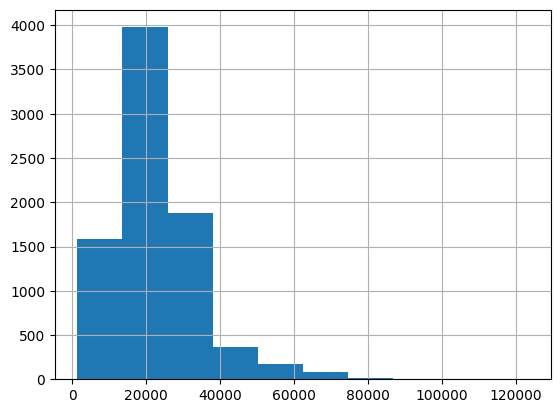

In [230]:
# на гистограме виднео, что большее кол-вол авто около 20000
# но так же есть ЖИРНЫЙ хвост т.е дорогие тачки в хвосте, жирные == дорогие
train['price'].hist()

In [110]:
# вот описание в цифрах, медиана чуть больше среднего => значит жирный хвост
train['price'].describe()

count      8085.000000
mean      22668.821645
std       11469.825387
min        1445.000000
25%       14800.000000
50%       20022.000000
75%       27850.000000
max      123456.000000
Name: price, dtype: float64

In [111]:
# посмотрим глазами по годам
# до 12 года данных по годам мало
df.groupby('year')['price'].agg(['count','mean','median'])

,count,mean,median
year,,,
1996,1,5995.000000,5995.0
1997,1,3950.000000,3950.0
1998,1,3950.000000,3950.0
1999,4,3285.000000,3972.5
2000,2,1624.500000,1624.5
2001,3,7333.333333,5950.0
2002,6,5486.500000,3494.5
2003,2,9222.500000,9222.5
2004,12,8213.166667,4120.0


<Axes: xlabel='year'>

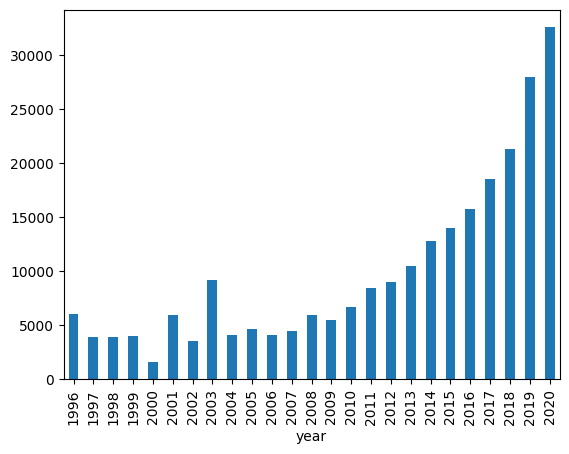

In [112]:
# по годам на графике
# чем ноаеее тем дороже
df.groupby('year')['price'].median().plot(kind='bar') # или без kind='bar'

<Axes: xlabel='year', ylabel='price'>

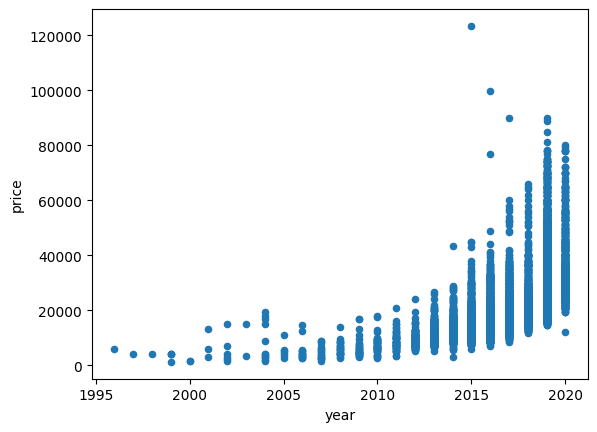

In [113]:
# посмотрим Скаттером
df.plot(x='year', y='price', kind="scatter")

In [114]:
# Baseline - исходная точка, которую мы должны превзойти или свмысла нет
# обычно это среднее или медиана отклонения

In [282]:
# под капотом
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train['price_pred_mean'] = train['price'].mean() # столбец со средней ценой
train['err'] = train['price_pred_mean'] - train['price'] # столбец с разницей между ценой и средней ценой
train['error_abs'] = abs(train['err']) # abs-ом отбросим минус у разницы цены
# train['error_abs'].mean() средняя абсолютная ошибка = 8450.556631461715

# это необязательно, для общего понимания
train['error_abs_perc'] = train['error_abs'] / train['price'] # ошибка в % для текущей строки
train['error_abs_perc'].mean() # средняя ошибка по всему столбцу ошибки

# Вывод: т.е в среднем мы ошибаемся на 48% при таком способе прогнозирования стоимости авто
# это и есть исходная точка, baseline. Сможем ли мы ее улучшить?


# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

0.48316912602731443

In [283]:
# то же самое с медианой

train['price_pred_median'] = train['price'].median()
train['err_median'] = train['price_pred_median'] - train['price']
train['error_median_abs'] = abs(train['err'])
# train['error_median_abs'].median() медианная абсолютная ошибка = 6973.821645021646

# это необязательно, для общего понимания
train['error_median_abs_perc'] = train['error_median_abs'] / train['price']
train['error_median_abs_perc'].median()
# Вывод: т.е в среднем мы ошибаемся на 31%

0.31296191407723456

In [117]:
# модуль со средней абмолютной, средней абмолютной в %, медианной абсолютной ошибкой
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, median_absolute_error


In [284]:
# то же самое, но методом )))

# 2 аргумента: 1- нужный столбец
#              2- средняя цена по этому столбцу

def error_func(data, data_pred_mean, data_pred_median):
  print("dif mean:", mean_absolute_error(data['price'], data_pred_mean)) # средняя абсолютная ошибка 8450.556631461715
  print('dif mean in perc:', mean_absolute_percentage_error(data['price'], data_pred_mean)) # средняя абсолютная ошибка в % 0.48316912602731443
  print('dif median:', median_absolute_error(data['price'], data_pred_median)) # медианная абсолютная ошибка 6122.0

# средняя медианная ошибка меньше, значит ориентируемся на нее как на baseline

error_func(train, train['price_pred_mean'], train['price_pred_median'])

dif mean: 8450.556631461715
dif mean in perc: 0.48316912602731443
dif median: 6122.0


In [285]:
# тут мы пердсказываем столбец price_pred_mean в ТЕСТОВОЙ выборке НА ОСНОВЕ ТРЕНИРОВОЧНОЙ
test['price_pred_mean'] = train['price'].mean()
test['price_pred_median'] = train['price'].median()

In [286]:
# на тестовой выборке появился новый столбец с предсказанием по тренировочной выборке
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,22668.821645,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,22668.821645,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,22668.821645,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,22668.821645,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,22668.821645,20022.0


In [287]:
# Результат на тестовой выборке(!!!)

error_func(test, test['price_pred_mean'], test['price_pred_median'])

# Вывод: эти абсолютные ошибки в тестовой выборке примерно такие же как и в тренировочной, значить данные однородны и все ОК
# Baseline работает, надо его побить

dif mean: 8335.240151194008
dif mean in perc: 0.4688621878275173
dif median: 6032.0


In [122]:
# Среднее на основе года (алгоритм в таблице)

In [288]:
# алгоритм в виде таблицы:
# если год 2020, то среднее 35359.445652 и т.д
model_year_mean_median = train.groupby('year')['price'].agg(['mean', 'median']).reset_index()
# переименуем столбцы, что для мерджа с траиновой таблицей
model_year_mean_median = model_year_mean_median.rename(columns = {'year':'year', 'mean':'price_pred_year_mean', 'median':'price_pred_year_median'})
model_year_mean_median.tail(5)

,year,price_pred_year_mean,price_pred_year_median
20,2016,16531.655222,15699.5
21,2017,19205.839506,18299.5
22,2018,22562.450394,21000.0
23,2019,31066.986143,27980.0
24,2020,35359.445652,32450.5


In [289]:
# мерджим
train = train.merge(model_year_mean_median, how='left', on='year')

In [290]:
model_year_mean_median.tail(5)

,year,price_pred_year_mean,price_pred_year_median
20,2016,16531.655222,15699.5
21,2017,19205.839506,18299.5
22,2018,22562.450394,21000.0
23,2019,31066.986143,27980.0
24,2020,35359.445652,32450.5


In [291]:
train.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,err,error_abs,error_abs_perc,price_pred_median,err_median,error_median_abs,error_median_abs_perc,price_pred_year_mean,price_pred_year_median
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,9877.821645,9877.821645,0.772248,20022.0,7231.0,9877.821645,0.772248,11041.347826,10490.0
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,-1326.178355,1326.178355,0.055269,20022.0,-3973.0,1326.178355,0.055269,31066.986143,27980.0
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,-3326.178355,3326.178355,0.127955,20022.0,-5973.0,3326.178355,0.127955,15086.536313,14103.5
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,-2331.178355,2331.178355,0.093247,20022.0,-4978.0,2331.178355,0.093247,31066.986143,27980.0
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,11718.821645,11718.821645,1.070212,20022.0,9072.0,11718.821645,1.070212,15086.536313,14103.5


In [292]:
# есть пропуски ?
# если есть пропуски => в выборке есть сочетания, которых не было в модели...
# значит модель не отражает всех вариантов нашей реальности (но в train не может быть nan т.к модель/группировка была по train)
# а если в мердже теста с моделью будут nan, то группировки в train надо делать больше
train.isna().mean()

model                     0.0
year                      0.0
price                     0.0
transmission              0.0
mileage                   0.0
fuelType                  0.0
tax                       0.0
mpg                       0.0
engineSize                0.0
price_pred_mean           0.0
err                       0.0
error_abs                 0.0
error_abs_perc            0.0
price_pred_median         0.0
err_median                0.0
error_median_abs          0.0
error_median_abs_perc     0.0
price_pred_year_mean      0.0
price_pred_year_median    0.0
dtype: float64

In [293]:
# считаем ошибку train
# тут мы получаем среднюю, медианную ошибки и % (все абсолютное) на основе года

error_func(train, train['price_pred_year_mean'], train['price_pred_year_median'])


# точность гораздо выше с переменной года, чем без нее

dif mean: 5474.243598515644
dif mean in perc: 0.2447228468704618
dif median: 3230.0


In [294]:
# есть пропуски ?
test.isna().mean()

model                0.0
year                 0.0
price                0.0
transmission         0.0
mileage              0.0
fuelType             0.0
tax                  0.0
mpg                  0.0
engineSize           0.0
price_pred_mean      0.0
price_pred_median    0.0
dtype: float64

In [295]:
# если есть:
test = test.dropna().copy()
test.isna().mean()

model                0.0
year                 0.0
price                0.0
transmission         0.0
mileage              0.0
fuelType             0.0
tax                  0.0
mpg                  0.0
engineSize           0.0
price_pred_mean      0.0
price_pred_median    0.0
dtype: float64

In [245]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,price_pred_median
8728,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,22668.821645,20022.0
761,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,22668.821645,20022.0
7209,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,22668.821645,20022.0
6685,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,22668.821645,20022.0
8548,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,22668.821645,20022.0
...,...,...,...,...,...,...,...,...,...,...,...
9825,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,22668.821645,20022.0
3522,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,22668.821645,20022.0
9757,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,22668.821645,20022.0
6100,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,22668.821645,20022.0


In [296]:
# тоже самое, но на тесте
# Мерджим модель с тестом
test = test.merge(model_year_mean_median, how='left', on='year')


In [297]:
# считаем ошибку на тесте
error_func(test, test['price_pred_year_mean'], test['price_pred_year_median'])

# различия на train и test незначительны, это хорошо
# медианное значение лучше, берем его

dif mean: 5426.271071211102
dif mean in perc: 0.23933940428873632
dif median: 3209.75


In [138]:
# Добавляем переменную двигателя


In [298]:
# сгруппируем двигатели по обьему

def engine_group(x):
  if x <= 1.5:
     return '<= 1.5'
  if x <= 2:
    return '<= 2'
  return '> 2'

# стобец engine_group в train для дальнейшей группировки
train['engine_group'] = train['engineSize'].apply(engine_group)


In [299]:
# добавим в нашу модель новое условие (переменную группы двигателя)
# добавим count для понимания количества

model_year_engine_mean_median = train.groupby(['year', 'engine_group'])['price'].agg(['mean', 'median', 'count']).reset_index()


# переименуем столбцы
model_year_engine_mean_median.columns = ['year', 'engine_group', 'price_pred_year_engine_mean', 'price_pred_year_engine_median', 'year_engine_count']

# модель: если год 96, и движ > 2, то:...

model_year_engine_mean_median.head(5)

,year,engine_group,price_pred_year_engine_mean,price_pred_year_engine_median,year_engine_count
0,1996,> 2,5995.0,5995.0,1
1,1997,<= 2,3950.0,3950.0,1
2,1998,<= 2,3950.0,3950.0,1
3,1999,<= 2,3980.0,3995.0,3
4,2000,> 2,1550.0,1550.0,1


In [300]:
# смерджим модель со всей таблицей, по 2 ключам/параметрам (году и группе двигателя)
train = train.merge(model_year_engine_mean_median, how='left', on=['year', 'engine_group'])

In [301]:
# считаем ошибку на основе модели из 2 параметров/условий
# тут мы получаем среднюю, медианную ошибки и % (все абсолютное) на основе года


error_func(train, train['price_pred_year_engine_mean'], train['price_pred_year_engine_median'])

# Результат на трэйне улучшили по всем значениям

dif mean: 3724.702302602664
dif mean in perc: 0.16707471126616255
dif median: 2369.0


In [302]:
test.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,price_pred_median,price_pred_year_mean,price_pred_year_median
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,22668.821645,20022.0,22562.450394,21000.0
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,22668.821645,20022.0,13411.333333,12797.5
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,22668.821645,20022.0,31066.986143,27980.0
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,22668.821645,20022.0,31066.986143,27980.0
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,22668.821645,20022.0,22562.450394,21000.0


In [303]:
model_year_engine_mean_median.head(5)

,year,engine_group,price_pred_year_engine_mean,price_pred_year_engine_median,year_engine_count
0,1996,> 2,5995.0,5995.0,1
1,1997,<= 2,3950.0,3950.0,1
2,1998,<= 2,3950.0,3950.0,1
3,1999,<= 2,3980.0,3995.0,3
4,2000,> 2,1550.0,1550.0,1


In [304]:
test['engine_group'] = test['engineSize'].apply(engine_group)
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group
0,1 Series,2018,15300,Manual,36469,Diesel,150,50.4,1.5,22668.821645,20022.0,22562.450394,21000.0,<= 1.5
1,5 Series,2014,15495,Semi-Auto,51565,Diesel,160,51.4,2.0,22668.821645,20022.0,13411.333333,12797.5,<= 2
2,X3,2019,39875,Semi-Auto,8988,Diesel,150,36.7,3.0,22668.821645,20022.0,31066.986143,27980.0,> 2
3,2 Series,2019,21730,Automatic,5054,Petrol,145,39.2,1.5,22668.821645,20022.0,31066.986143,27980.0,<= 1.5
4,2 Series,2018,13799,Manual,13369,Diesel,145,65.7,1.5,22668.821645,20022.0,22562.450394,21000.0,<= 1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2691,4 Series,2019,25500,Automatic,3250,Petrol,145,48.7,2.0,22668.821645,20022.0,31066.986143,27980.0,<= 2
2692,7 Series,2019,52700,Semi-Auto,706,Diesel,145,44.1,3.0,22668.821645,20022.0,31066.986143,27980.0,> 2
2693,3 Series,2017,15795,Automatic,64000,Hybrid,0,134.5,2.0,22668.821645,20022.0,19205.839506,18299.5,<= 2
2694,4 Series,2019,29840,Automatic,6000,Diesel,145,60.1,2.0,22668.821645,20022.0,31066.986143,27980.0,<= 2


In [202]:
# Прверка тестовых данных
# добавим стобец engine_group для джойна по 2 параметрам (год, двигатели)
# test['engine_group'] = train['engineSize'].apply(engine_group) #!!!!!!!!


In [305]:
test.isna().mean()

model                     0.0
year                      0.0
price                     0.0
transmission              0.0
mileage                   0.0
fuelType                  0.0
tax                       0.0
mpg                       0.0
engineSize                0.0
price_pred_mean           0.0
price_pred_median         0.0
price_pred_year_mean      0.0
price_pred_year_median    0.0
engine_group              0.0
dtype: float64

In [306]:


# джойним тестовую таблицу
test = test.merge(model_year_engine_mean_median, how='left', on=['year', 'engine_group'])

In [307]:
# проеверим есть ли пустые значение, т.е сочетание двигателя и года нет в модели
# есть
test.isna().mean()

model                            0.000000
year                             0.000000
price                            0.000000
transmission                     0.000000
mileage                          0.000000
fuelType                         0.000000
tax                              0.000000
mpg                              0.000000
engineSize                       0.000000
price_pred_mean                  0.000000
price_pred_median                0.000000
price_pred_year_mean             0.000000
price_pred_year_median           0.000000
engine_group                     0.000000
price_pred_year_engine_mean      0.000742
price_pred_year_engine_median    0.000742
year_engine_count                0.000742
dtype: float64

In [308]:
# сколько таких и кто они?
test[test['price_pred_year_engine_mean'].isna()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,price_pred_median,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_mean,price_pred_year_engine_median,year_engine_count
415,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,22668.821645,20022.0,3980.0,3995.0,> 2,NaN,NaN,NaN
2255,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,22668.821645,20022.0,1550.0,1550.0,<= 2,NaN,NaN,NaN


In [309]:
# выбросим их из тестовой таблицы, таких мало
test = test.dropna()#.copy()

In [310]:
# Проверка на тесте

error_func(test, test['price_pred_year_engine_mean'], test['price_pred_year_engine_median'])
# модель улучшили

dif mean: 3834.5828483785476
dif mean in perc: 0.17013417399344982
dif median: 2500.0


In [311]:
error_func(train, train['price_pred_year_engine_mean'], train['price_pred_year_engine_median'])

dif mean: 3724.702302602664
dif mean in perc: 0.16707471126616255
dif median: 2369.0


In [312]:
error_func(train, train['price_pred_year_mean'], train['price_pred_year_median'])

dif mean: 5474.243598515644
dif mean in perc: 0.2447228468704618
dif median: 3230.0


In [313]:
error_func(test, test['price_pred_year_mean'], test['price_pred_year_median'])

dif mean: 5429.212252407249
dif mean in perc: 0.2386245986078337
dif median: 3212.25


In [314]:
# поинт
# До момента введения переменной коробки все ок (работает random_state)
# Нужно попробовать ввести добавить переменную коробки в траин и посмотреть ошибку
# Посмотреть видео

In [ ]:
# Добавление коробки

In [315]:
# !!! переименовать агрегатные столбцы
model_year_engine_trn_mean_median = train.groupby(['year', 'engine_group', 'transmission'])['price'].agg(['mean', 'median', 'count']).reset_index()
model_year_engine_trn_mean_median = model_year_engine_trn_mean_median.rename(columns =
 {'year':'year', 'mean':'price_pred_year_trn_mean', 'median':'price_pred_year_trn_median','count':'price_pred_year_trn_count'})

In [316]:
# включим показывание большего количества строк
pd.options.display.max_rows = 999

In [317]:
# тут видно, что многие вариации имеют лишь несколько авто,
# соответсвенно неправильно считать среднее из 2 или 3 авто
# на тесте могут появиться пустые значения так как там вообще может не оказаться чего-то
model_year_engine_trn_mean_median

,year,engine_group,transmission,price_pred_year_trn_mean,price_pred_year_trn_median,price_pred_year_trn_count
0,1996,> 2,Automatic,5995.000000,5995.0,1
1,1997,<= 2,Manual,3950.000000,3950.0,1
2,1998,<= 2,Manual,3950.000000,3950.0,1
3,1999,<= 2,Manual,3980.000000,3995.0,3
4,2000,> 2,Automatic,1550.000000,1550.0,1
5,2001,<= 1.5,Manual,13000.000000,13000.0,1
6,2001,> 2,Automatic,3050.000000,3050.0,1
7,2001,> 2,Manual,5950.000000,5950.0,1
8,2002,<= 2,Automatic,3999.000000,3999.0,1
9,2002,> 2,Automatic,4292.500000,4292.5,2


In [215]:
# добавим столбец группировки по годам

# model_year_engine_trn_mean_median


In [318]:
def year_group(x):
  if x <= 2005:
     return '1996-2005'
  if x <= 2010:
     return '2006-2010'
  if x <= 2012:
     return '2010-2012'
  if x == 2013:
     return '2013'
  if x == 2014:
     return '2014'
  if x == 2015:
     return '2015'
  if x == 2016:
     return '2016'
  if x == 2017:
     return '2017'
  if x == 2018:
     return '2018'
  if x == 2019:
     return '2019'
  if x == 2020:
     return '2020'

# стобец engine_group в train для дальнейшей группировки
train['year_group'] = train['year'].apply(year_group)

In [319]:

train.head(5)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,...,err_median,error_median_abs,error_median_abs_perc,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_mean,price_pred_year_engine_median,year_engine_count,year_group
0,5 Series,2013,12791,Semi-Auto,55642,Diesel,145,55.4,2.0,22668.821645,...,7231.0,9877.821645,0.772248,11041.347826,10490.0,<= 2,10099.985782,9990.0,211,2013
1,1 Series,2019,23995,Semi-Auto,1527,Petrol,145,43.5,1.5,22668.821645,...,-3973.0,1326.178355,0.055269,31066.986143,27980.0,<= 1.5,21709.400000,20980.0,395,2019
2,X5,2015,25995,Automatic,43344,Diesel,200,47.1,3.0,22668.821645,...,-5973.0,3326.178355,0.127955,15086.536313,14103.5,> 2,19718.327778,18144.5,180,2015
3,2 Series,2019,25000,Automatic,4000,Petrol,145,47.9,2.0,22668.821645,...,-4978.0,2331.178355,0.093247,31066.986143,27980.0,<= 2,27744.770237,27294.0,1606,2019
4,1 Series,2015,10950,Manual,33000,Diesel,20,72.4,1.5,22668.821645,...,9072.0,11718.821645,1.070212,15086.536313,14103.5,<= 1.5,12181.313253,10999.0,83,2015


In [320]:
model_year_gr_engine_trn_mean_median.head(5)

,year_group,engine_group,transmission,price_pred_year_group_trn_mean,price_pred_year_group_trn_median,price_pred_year_group_trn_count
0,1996-2005,<= 1.5,Manual,13000.000000,13000.0,1
1,1996-2005,<= 2,Automatic,4490.666667,3999.0,3
2,1996-2005,<= 2,Manual,3519.375000,3950.0,8
3,1996-2005,> 2,Automatic,5123.888889,3495.0,9
4,1996-2005,> 2,Manual,8816.625000,7350.0,8


In [321]:
# модель с группировкой по годам
model_year_gr_engine_trn_mean_median = train.groupby(['year_group', 'engine_group', 'transmission'])['price'].agg(['mean', 'median', 'count']).reset_index()

model_year_gr_engine_trn_mean_median = model_year_gr_engine_trn_mean_median.rename(columns =
 {'mean':'price_pred_year_group_trn_mean', 'median':'price_pred_year_group_trn_median','count':'price_pred_year_group_trn_count'})




In [331]:
train = train.merge(model_year_gr_engine_trn_mean_median, how='left', on=['year_group', 'engine_group', 'transmission'])

In [ ]:
# проверим nan

train.isna().mean()


In [336]:
test['year_group'] = test['year'].apply(year_group)

In [337]:
error_func(train, train['price_pred_year_group_trn_mean'], train['price_pred_year_group_trn_median'])

dif mean: 3544.4905194158196
dif mean in perc: 0.15586258398135458
dif median: 2096.0


In [339]:
# посмотрим пропуски
test = test.merge(model_year_gr_engine_trn_mean_median, how='left', on=['year_group', 'engine_group', 'transmission'])
test.isna().mean()

model                               0.000000
year                                0.000000
price                               0.000000
transmission                        0.000000
mileage                             0.000000
fuelType                            0.000000
tax                                 0.000000
mpg                                 0.000000
engineSize                          0.000000
price_pred_mean                     0.000000
price_pred_median                   0.000000
price_pred_year_mean                0.000000
price_pred_year_median              0.000000
engine_group                        0.000000
price_pred_year_engine_mean         0.000000
price_pred_year_engine_median       0.000000
year_engine_count                   0.000000
year_group                          0.000000
price_pred_year_group_trn_mean      0.001114
price_pred_year_group_trn_median    0.001114
price_pred_year_group_trn_count     0.001114
dtype: float64

In [342]:
# что за пропуски?
test[test['price_pred_year_group_trn_median'].isna()]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred_mean,...,price_pred_year_mean,price_pred_year_median,engine_group,price_pred_year_engine_mean,price_pred_year_engine_median,year_engine_count,year_group,price_pred_year_group_trn_mean,price_pred_year_group_trn_median,price_pred_year_group_trn_count
248,1 Series,2011,20999,Manual,14200,Petrol,145,36.2,3.0,22668.821645,...,8860.297297,8470.0,> 2,11373.333333,10500.0,9.0,2010-2012,NaN,NaN,NaN
691,Z4,2011,10450,Manual,64250,Petrol,305,33.2,2.5,22668.821645,...,8860.297297,8470.0,> 2,11373.333333,10500.0,9.0,2010-2012,NaN,NaN,NaN
2098,Z4,2011,12995,Manual,26000,Petrol,300,33.2,2.5,22668.821645,...,8860.297297,8470.0,> 2,11373.333333,10500.0,9.0,2010-2012,NaN,NaN,NaN


In [344]:
# удалим их
test = test.dropna().copy()
test.isna().mean()

model                               0.0
year                                0.0
price                               0.0
transmission                        0.0
mileage                             0.0
fuelType                            0.0
tax                                 0.0
mpg                                 0.0
engineSize                          0.0
price_pred_mean                     0.0
price_pred_median                   0.0
price_pred_year_mean                0.0
price_pred_year_median              0.0
engine_group                        0.0
price_pred_year_engine_mean         0.0
price_pred_year_engine_median       0.0
year_engine_count                   0.0
year_group                          0.0
price_pred_year_group_trn_mean      0.0
price_pred_year_group_trn_median    0.0
price_pred_year_group_trn_count     0.0
dtype: float64

In [346]:
error_func(test, test['price_pred_year_group_trn_mean'], test['price_pred_year_group_trn_median'])


dif mean: 3669.244665960291
dif mean in perc: 0.15927207536870594
dif median: 2281.0


In [347]:
error_func(train, train['price_pred_year_group_trn_mean'], train['price_pred_year_group_trn_median'])


dif mean: 3544.4905194158196
dif mean in perc: 0.15586258398135458
dif median: 2096.0


In [348]:
# Проверка на тесте

error_func(test, test['price_pred_year_engine_mean'], test['price_pred_year_engine_median'])
# модель улучшили

dif mean: 3834.3350155574662
dif mean in perc: 0.17007429542465805
dif median: 2500.0


In [349]:
error_func(train, train['price_pred_year_engine_mean'], train['price_pred_year_engine_median'])

dif mean: 3724.702302602664
dif mean in perc: 0.16707471126616255
dif median: 2369.0


In [350]:
error_func(train, train['price_pred_year_mean'], train['price_pred_year_median'])

dif mean: 5474.243598515644
dif mean in perc: 0.2447228468704618
dif median: 3230.0


In [351]:
error_func(test, test['price_pred_year_mean'], test['price_pred_year_median'])

dif mean: 5428.626792968051
dif mean in perc: 0.23850104294708552
dif median: 3210.0


In [ ]:
# получилось сократить строки в модели и улучшить ошибку
# Итог: мы сделали модель/правило, где зная двигатель, год и коробку мы можем предсказать цену авто с прогнозируемой абсолютной ошибкой

2369.0